# Primer ejemplo

En este Notebook vamos a seguir paso a paso tal como se presenta en el libro del curso a partir de la página 13.

## Clasificación de especies del género *Iris*

Este es un problema clásico de aprendizaje supervisado. El objetivo es entrenar un sistema para que sea capaz de identificar automáticamente a qué especie pertenece una flor dado un conjunto de características morfológicas de ella:

*   largo del pétalo
*   ancho del pétalo
*   largo del sépalo
*   ancho del sépalo

Para _entrenar_ el sistema tenemos una colección de 150 especímenes. De cada especimen tenemos las 4 medidas y también sabemos a ciencia cierta a cuál especie pertenece.

El paquete `scikit-learn` ya viene con un conjunto de datos clásicos para fines pedagógicos. Vamos a cargar estos datos



In [1]:
#
# sub paquete datasets contiene conjuntos de datos clásicos
#
from sklearn import datasets
#
# cargamos los datos de IRIS
#
iris_dataset = datasets.load_iris()
#
# los datasets de sklearn son un diccionario de Python
# vemos qué tiene adentro
#
print('Contenido del dataset:\n', iris_dataset.keys() )
#
# DESCR tiene una descripción textual del dataset:
#
print('Descripción:\n',iris_dataset['DESCR'])

Contenido del dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Descripción:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3

In [2]:
#
# la clave (key) 'target_names' es una lista de cadenas de texto
# cada una contiene los nombres de las especies que queremos
# predecir; estas son las 'clases' en nuestro problema de clasificación
#
especies = iris_dataset['target_names']
print('Clases (especies):\n', especies)
#
# la clave 'feature_names' provee un nombre para cada característica (feature)
# relevada.
#
caracteristicas = iris_dataset['feature_names']
print('\nCaracterísticas (medidas):\n',caracteristicas)
#
# la clave 'data' es la que contiene los valores de las características
#  de cada una de las 150 muestras disponibles en forma de matriz.
#
# cada fila de la matriz corresponde a un especimen
# cada dato es un vector con los valores de las 4 medidas
#
print('\nMuestras:')

muestras = iris_dataset['data']
nfilas,ncolumnas = muestras.shape
print('\tCantidad de muestras:',nfilas)
print('\tMedidas por muestra:',ncolumnas)
#
# veamos los primeros 5 datos
# notar la sintaxis para especificar las primeras 5 filas de la matriz
#
# siempre es bueno inspeccionar visualmente, aunque sean sólo números,
# los datos que se van a utilizar
#
# en este caso vemos que las primeras 5 muestras tienen todas el mismo ancho
# de pétalo (0.2cm)
#
print('\nPrimeras 5 filas:\n', muestras[:5,:] )

#
# finalmente tenemos 'target', que contiene la especie correspondiente
# a cada muestra; esto es un arreglo (array) de 150 elementos
# correspondientes a las 150 filas del campo 'data'
#
# la especie se codifica con un número de 0 a 2 en este caso.
# cada uno de esos 3 valores se corresponde con una especie.
#
# dado el número, podemos ver a qué especie corresponde usando
# el campo iris_dataset['target_names'], que ya vimos.
#
# Por ejemplo, el número 0 se corresponde con 'setosa'
#
# Al dato que indica a qué clase pertenece cáda muestra lo llamamos usualmente
# 'etiqueta' (label en inglés)
#
etiquetas = iris_dataset['target']
print('\nEtiquetas:\n',etiquetas)


Clases (especies):
 ['setosa' 'versicolor' 'virginica']

Características (medidas):
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Muestras:
	Cantidad de muestras: 150
	Medidas por muestra: 4

Primeras 5 filas:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Etiquetas:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Midiendo el desempeño: datos de entrenamiento y de prueba (test)

Ahora que tenemos las muestras, y sabemos a qué especie pertenece cada una, queremos construir un sistema que aprenda de eso para luego ser capaz de inferir la especie de nuevas flores que veamos a partir de sus medidas.

Para eso, necesitamos tener una medida de qué tan bueno es nuestro sistema para inferir especies.

El tema es que no podemos evaluar el desempeño de nuestro sistema con  los mismos datos que usamos para entrenarlo. Si hiciéramos eso, el mejor sistema posible sería siempre el que simplemente recuerde a qué especie pertenece cada muestra; eso no sería aprender, sino memorizar.

Para evaluar el desempeño, necesitamos saber qué tan bueno es nuestro sistemas para inferir la especie de muestras _nunca_ vistas antes en el entrenamiento.

La idea es separar nuestro conjunto de datos en dos partes: uno de _entrenamiento_ (training) y otro de _prueba_ (test). El primer conjunto es utilizado para enseñarle al sistema.

Luego de entrenado el sistema, presentamos a éste las muestras del conjunto de prueba y cotejamos la especie inferida por el sistema por la especie _correcta_, que conocemos de antemano.

Veremos ahora cómo armar estos subconjuntos con las utilidades de `scikit-learn`

In [3]:
from sklearn import model_selection
#
# para abreviar,
# llamamos 'X' a las muestras e 'y' a las etiquetas
#
# la función train_test_split, por defecto, separa 75% de los datos
# (tomados al azar) para entrenamiento, y el 25% para prueba
#
Xtrain, Xtest, ytrain,ytest = model_selection.train_test_split(muestras,etiquetas)
#
# veamos los tamaños
#
print('Cantidad de datos de entrenamiento:',len(ytrain))
print('Cantidad de datos de prueba       :',len(ytest))
#


Cantidad de datos de entrenamiento: 112
Cantidad de datos de prueba       : 38


## Inspección visual

Siempre es buena idea inspeccionar los datos visualmente antes de empezar a trabajar. De esa manera podemos adquirir intuición sobre el problema, posibles patrones y particularidades que podemos explotar para construir un sistema más efectivo.

La forma más natural de ver los datos es un puntillado (scatter plot) en donde
 cada muestra es presentada en el espacio como un punto.

El mayor problema que suele presentarse a esta altura es que nosotros los humanos no tenemos una forma efectiva de visualizar datos en más de 2 (talvez 3) dimensiones, lo cual suele ser bastante menos que la dimensión de los datos (en nuestro caso 4).

Lo que podemos hacer, por ejemplo, es mirar los datos de a pares de coordenadas,
 es decir, si tenemos 4 coordenadas (a,b,c,d), podemos pintar los datos  en el plano mirando sólamente a y b, luego a y c, luego a y d, luego b y c, etc.

### Pandas

Aquí vamos a usar la biblioteca **Pandas**. Esta biblioteca permite trabajar con datos de una manera similar a como lo hace el lenguaje R, es decir, a un nivel de abstracción mayor: mientras que en NumPy los datos son simplemente matrices numéricas (o de texto), en Pandas (y en R) se trabaja con _tablas_. En las tablas, las filas y las columnas tienen nombre, es decir, tienen un significado intrínseco. El nombre que se le da a estas tablas en Pandas es `DataFrame`. Veremos ahora cómo armar una tabla de datos en Pandas, y usaremos sus funcionalidades para visualizar los datos que queremos clasificar.


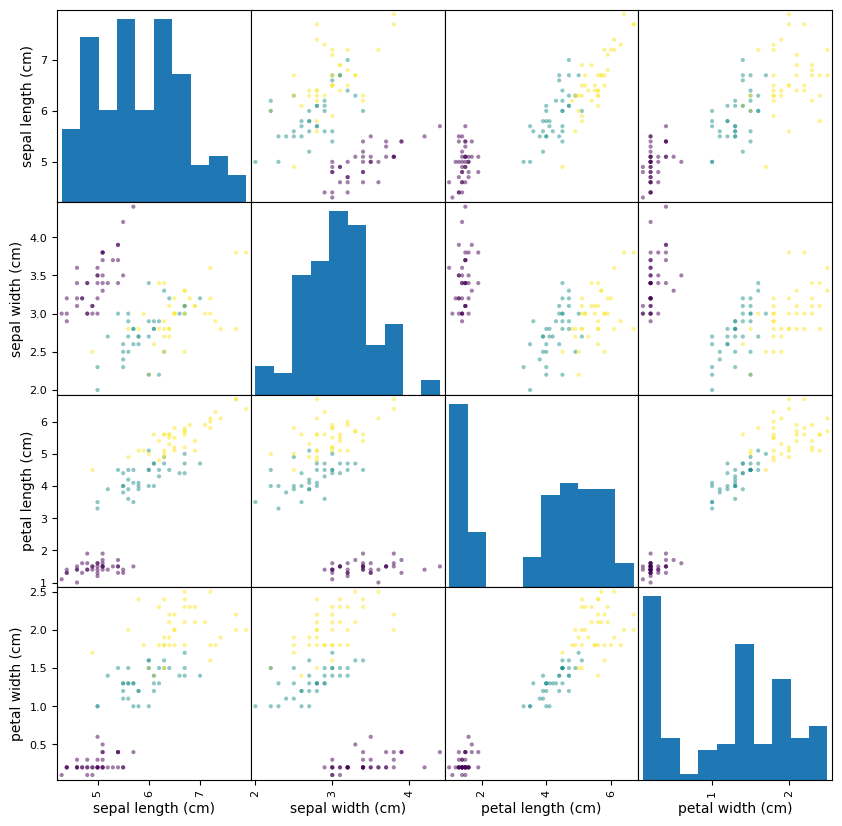

In [4]:
# paquete principal
import pandas
# subpaquete para dibujar
from pandas import plotting as pandas_plot
#
# creamos una tabla con los datos de entrenamiento de iris,
# dando el nombre correspondiente a cada columna
#
tabla_iris = pandas.DataFrame(Xtrain,columns=iris_dataset.feature_names)
#
# la función scatter_matrix muestra un mosaico de gráficas  en donde cada
# gráfica fuera de la diagonal es la nube de puntos obtenida en base a
# dos medidas distintas.
# En la diagonal se muestran los histogramas de cada medida
# El color de cada punto (argumento 'c' de scatter_matrix) se define
# según la etiqueta del dato correspondiente.
#
# (NOTA: el libro usa una versión vieja de Pandas;
# la forma correcta es la siguiente)

grr = pandas_plot.scatter_matrix(tabla_iris, c=ytrain, figsize=(10,10))

De inspeccionar los datos podemos sacar algunas conclusiones. Por ejemplo, en casi todos los casos vemos que alcanza con dos características para separar bien una de las clases (violeta) de las otras dos. Ya las otras dos están bastante pegadas en la mayoría de los casos, llegando a mezclarse mucho por ejemplo si sólo consideramos el ancho y el largo de los sépalos (segunda fila a la izquierda).


# Primer modelo: k-NN

En este momento es que comienzan las decisiones técnicas. Hay muchos métodos posibles para entrenar un sistema de clasificación para este problema.

Nuestro primer modelo es el llamado _k vecinos más cercanos_. Este es un método muy simple y consiste en lo siguiente: para inferir la etiqueta de una nueva muestra, ubicamos el punto $x_0$ correspondiente a esta muestra en el espacio de caracerísticas (en nuestro caso, un espacio de 4 dimensiones). Luego miramos a qué clase (en nuestro caso, especie) pertenecen los $k$ puntos vecinos más cercanos  a $x_0$ en el espacio, y resolvemos que la clase de nuestro nuevo punto es la más frecuente entre los $k$ vecinos (si hay un empate, elegimos al azar entre las mayoritarias).
En el caso más sencillo, miramos un sólo vecino (1-nn) y resolvemos que esa también es la clase de nuestra nueva muestra $x_0$.

A pesar de la sencillez de este método, tanto conceptual como algorítmica (de hecho no hay ajuste de parámetros; simplemente se memoriza el conjunto de entrenamiento), el $k-nn$ puede y suele ser suficiente para muchos problemas.

Pongamos esto en marcha usando `sklearn`

In [5]:
#
# traemos el clasificador correspondiente de sklearn
#
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#
# creamos un clasificador k-nn con k (n_neighbors) = 1
#
# la variable knn no es un número, ni texto:
# es lo que se llama un 'objeto' de tipo 'KNeighborsClassifier'
# más que variable, es como un conjunto de variables bajo un mismo nombre
# que además tiene funciones asociadas.
#
knn = KNeighborsClassifier(n_neighbors=1) # k = 1
#
# ajustamos (fit) el modelo a los datos de _entrenamiento_
#
# esto no produce un resultado hacia 'afuera', sino que modifica
# internamente el _estado_ del objeto
#
knn.fit(Xtrain,ytrain)
#
# listo, ahora podemos usar nuestro modelo para inferir
# la especie de un dato nuevo
#
# aunque sea solo un dato, los clasificadores de SKLearn
# siempre espera que se les pase una matriz donde
# cada fila es un dato, así que tenemos que armar una matriz
# de 1 x 4 y poner nuestro dato en la primera (y única) fila
Xnuevo = np.array([
                   [5.0, 2.9, 1.0, 0.2]
                   ])
ynuevo = knn.predict(Xnuevo)
enuevo = especies[ynuevo]
print(f'Especie inferida: etiqueta {ynuevo}, correspondiente a especie {enuevo}')


Especie inferida: etiqueta [0], correspondiente a especie ['setosa']


# Evaluación de desempeño

Tenemos un sistema que dada una nueva muestra es capaz de inferir la especie de la flor. Sin embargo, no tenemos información aún para _confiar_ en ese resultado.
Para eso es que vamos a usar el conjunto de _prueba_. En ese conjunto, que el sistema nunca vio, sabemos de antemano a qué especie pertenece cada muestra. Lo que hacemos ahora es tomarle un examen al clasificador: lo hacemos inferir la especie de cada muestra, y cotejamos su decisión con la decisión correcta que ya conocemos.



In [6]:
#
# vemos qué arroja el clasificador para cada dato de prueba
#
ytest_segun_knn = knn.predict(Xtest) # lo que infiere k-NN
ytest_posta = ytest # los que sabíamos de antemano

print('\nEtiquetas inferidas sobre el conjunto de prueba:\n',ytest_segun_knn)
#
# cotejamos con las etiquetas correctas
# el operador == es un operador de _comparación_:
# a == b devuelve el valor booleano True si a y b son idénticos,
# y False si no lo son.
#
# NO CONFUNDIR con operador '='. Un sólo '=' se usa para *asignar*,
# es decir, para darle valor a una cosa (ej., una variable)!
#
# si usamos == sobre dos listas del mismo largo en NumPy
# obtendremos una lista del mismo largo donde cada elemento corresponde a la
# comparación entre los dos elementos correspondientes de las listas comparadas.
#
#
es_correcto = (ytest_segun_knn == ytest_posta)
#
# el desempeño es simplemente el porcentaje de datos de prueba en donde
# el k-NN produjo el valor correcto.
#
# Como NumPy permite interpretar vectores booleanos como números (True -> 1, False ->0)
# el porcentaje lo obtenemos simplemente como el promedio de 'es_correcto'
# para hacer promedios tenemos la función 'mean' de NumPy.
#
score = 100*np.mean(es_correcto) # porcentaje: 100 x fracción de inferencias correctas
score = np.round(score) # redondeamos
print(f'\nNuestro sistema produjo el resultado correcto en el {score}% de los casos.\n')




Etiquetas inferidas sobre el conjunto de prueba:
 [1 2 0 1 0 1 2 2 1 2 2 1 1 0 1 2 2 0 1 0 2 1 0 2 2 2 2 1 1 1 1 1 0 0 0 0 2
 0]

Nuestro sistema produjo el resultado correcto en el 97.0% de los casos.

